In [5]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the GeoPackage file
file_path = "../data/data_layers/SIGEOM_QC_Geologie_du_Quaternaire_GPKG/sigeom.gpkg"
gdf = gpd.read_file(file_path)

print("Columns:", gdf.columns)


/home/alexis/Documents/projets/species-dist/.venv/lib/python3.12/site-packages/pyogrio/geopandas.py:265: UserWarning: More than one layer found in 'sigeom.gpkg': 'F10R57_ZONE_MORPH_SEDIM_DOCUM' (default), 'F10E20_BLOC_ERRAT', 'F10E21_GROUP_MARQU_EROSI', 'F10R62_GROUP_MARQ_ERO_GLAC_DOC', 'F10E22_MARQU_EROSI_GLACI', 'F10E16_MORPH_SURFA_LG', 'F10E16_MORPH_SURFA_PG', 'F10E16_MORPH_SURFA_PT', 'F10R59_MORPH_SURFA_DOCUM_PT', 'F10E07_GEOMO', 'F10E06_FOSSI', 'F10E05_STRUC', 'F10E03_PHOTO', 'F10A02_LITHO_FACIES_SECON', 'F10A03_LITHO_FACIES_TERTI', 'F10A01_LITHO_FACIES_PRIMA', 'F10E02_LITHO', 'F10E01_SITE_OBSER_QUATE', 'F7E10_FEUILLET_SNRC', 'SGM_ZONE_MORPH_QC_SO', 'F10E04_ECHAN', 'SGM_CONCE_MINER_LOURD', 'SGM_MINER_EXTRA', 'SGM_CLASS_MINER', 'SGM_MINER_LOURD_SHP', 'F10E15_ZONE_MORPH_SEDIM'. Specify layer parameter to avoid this warning.
  result = read_func(


Columns: Index(['OBJECTID', 'PK', 'FK', 'NUMR_ZONE_SEDM', 'NUMR_RAPR', 'URL_NUMR_RAPR',
       'geometry'],
      dtype='object')


In [9]:
gdf[gdf['geometry'] == None]

,OBJECTID,PK,FK,NUMR_ZONE_SEDM,NUMR_RAPR,URL_NUMR_RAPR,geometry
0,1,,1139707,1139707.0,RP 2016-01,http://gq.mines.gouv.qc.ca/documents/EXAMINE/R...,None
1,2,,1139708,1139708.0,RP 2016-01,http://gq.mines.gouv.qc.ca/documents/EXAMINE/R...,None
2,3,,1139709,1139709.0,RP 2016-01,http://gq.mines.gouv.qc.ca/documents/EXAMINE/R...,None
3,4,,1139711,1139711.0,RP 2016-01,http://gq.mines.gouv.qc.ca/documents/EXAMINE/R...,None
4,5,,1139712,1139712.0,RP 2016-01,http://gq.mines.gouv.qc.ca/documents/EXAMINE/R...,None
...,...,...,...,...,...,...,...
376373,376374,,1169210,1169210.0,MB 2015-02,,None
376374,376375,,1173651,1173651.0,MB 2015-02,,None
376375,376376,,1181112,1181112.0,MB 2015-02,,None
376376,376377,,1182426,1182426.0,MB 2015-02,,None


## Extracting soilgrid data

In [2]:
west, south, east, north  = [-75.665588,45.263289,-70.894775,47.318345]
# Define width and height based on desired resolution
pixel_size_deg = 0.0009  # ~1 km
width = int((east - west) / pixel_size_deg)
height = int((north - south) / pixel_size_deg)

variable_name: Soil pH in H2O
variable_units: pH*10
service_url: https://maps.isric.org/mapserv?map=/map/phh2o.map
service_id: phh2o
coverage_id: phh2o_15-30cm_mean
crs: urn:ogc:def:crs:EPSG::4326
bounding_box: (-75.665588, 45.263289, -70.894775, 47.318345)
grid_res: [0.0009001533962264151, 0.0009001559351730193]


Text(0.5, 1.0, 'Mean pH between 0 and 5 cm soil depth in Senegal')

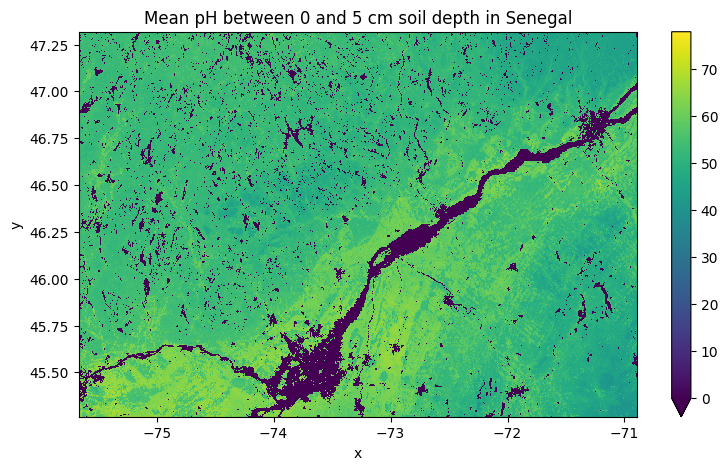

In [4]:
import matplotlib.pyplot as plt
from soilgrids import SoilGrids

# get data from SoilGrids
soil_grids = SoilGrids()
data = soil_grids.get_coverage_data(
    service_id="phh2o",
    coverage_id="phh2o_15-30cm_mean",
    west=west,
    south=south,
    east=east,
    north=north,
    width=width,
    height=height,
    crs="urn:ogc:def:crs:EPSG::4326",
    output="../data/data_layers/phh2o_15-30cm_mean.tif",
)

# show metadata
for key, value in soil_grids.metadata.items():
    print(f"{key}: {value}")


# plot data
data.plot(figsize=(9, 5), vmin=0)
plt.title("Mean pH between 0 and 5 cm soil depth in Senegal")

In [23]:
# get data from SoilGrids
soil_grids = SoilGrids()
soil_grids.get_coverage_list(service_id='wrb')

"wrb" map service includes 31 coverages(maps)

Acrisols
Albeluvisols
Alisols
Andosols
Arenosols
Calcisols
Cambisols
Chernozems
Cryosols
Durisols
Ferralsols
Fluvisols
Gleysols
Gypsisols
Histosols
Kastanozems
Leptosols
Lixisols
Luvisols
MostProbable
Nitisols
Phaeozems
Planosols
Plinthosols
Podzols
Regosols
Solonchaks
Solonetz
Stagnosols
Umbrisols
Vertisols


Acrisols
Albeluvisols
Alisols
Andosols
Arenosols
Calcisols
Cambisols
Chernozems
Cryosols
Durisols
Ferralsols
Fluvisols
Gleysols
Gypsisols
Histosols
Kastanozems
Leptosols
Lixisols
Luvisols
MostProbable
Nitisols
Phaeozems
Planosols
Plinthosols
Podzols
Regosols
Solonchaks
Solonetz
Stagnosols
Umbrisols
Vertisols

In [ ]:
import matplotlib.pyplot as plt
from soilgrids import SoilGrids


possible_coverages = ['Acrisols', 'Albeluvisols', 'Alisols', 'Andosols', 'Arenosols', 'Cambisols', 'Chernozems', 'Cryosols', 'Durisols', 'Ferralsols', 'Fluvisols', 'Gleysols', 'Gypsisols', 'Histosols', 'Kastanozems', 'Leptosols', 'Lixisols', 'Luvisols', 'Nitisols', 'Phaeozems', 'Planosols', 'Podzols', 'Regosols', 'Solonchaks', 'Solonetz', 'Stagnosols', 'Umbrisols', 'Vertisols']


def get_soil_data(coverage_id, west, south, east, north, width, height):
    soil_grids = SoilGrids()
    data = soil_grids.get_coverage_data(
        service_id="wrb",
        coverage_id=coverage_id,
        west=west,
        south=south,
        east=east,
        north=north,
        width=width,
        height=height,
        crs="urn:ogc:def:crs:EPSG::4326",
        output=f"../data/data_layers/{coverage_id}.tif",
    )
    return data

for coverage in possible_coverages:
    data = get_soil_data(coverage, west, south, east, north, width, height)
    print(f"Coverage: {coverage}")

Coverage: Umbrisols
Coverage: Vertisols


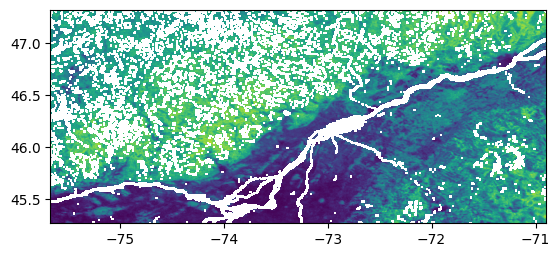

In [ ]:
#display .tif
import rasterio
from rasterio.plot import show

with rasterio.open('../data/data_layers/Podzols.tif') as src:
    show(src)

## Other satelitte bands

In [ ]:
import ee
import geemap
import os
import numpy as np
import rasterio

# Initialize Earth Engine
ee.Authenticate()
ee.Initialize()

def create_tiles(bbox, tile_size):
    """
    Divide a bounding box into smaller tiles.

    Args:
        bbox: Tuple (minx, miny, maxx, maxy)
        tile_size: Size of each tile in degrees (approx.)

    Returns:
        List of smaller bounding boxes.
    """
    minx, miny, maxx, maxy = bbox
    x_coords = np.arange(minx, maxx, tile_size)
    y_coords = np.arange(miny, maxy, tile_size)
    
    tiles = []
    for x in x_coords:
        for y in y_coords:
            tiles.append((x, y, min(x + tile_size, maxx), min(y + tile_size, maxy)))
    return tiles

def cloud_mask(image):
    """Apply cloud masking using the Sentinel-2 Scene Classification Layer (SCL)."""
    scl = image.select('SCL')
    cloud_free = scl.eq(4).Or(scl.eq(5))  # Keep vegetation and water pixels
    return image.updateMask(cloud_free)

def get_composite(tile, start_date, end_date, cloud_cover):
    """Get a cloud-free composite for the given tile with all necessary bands."""
    geometry = ee.Geometry.Rectangle(tile)
    collection = (ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')
                  .filterBounds(geometry)
                  .filterDate(start_date, end_date)
                  .filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', cloud_cover))
                  .map(cloud_mask))

    composite = collection.median()
    
    # Select all necessary bands
    selected_bands = ['B2', 'B3', 'B4', 'B8', 'B11']  # Blue, Green, Red, NIR, SWIR
    
    composite = composite.select(selected_bands)

    # Compute NDVI
    ndvi = composite.expression(
        '(NIR - RED) / (NIR + RED)', {
            'NIR': composite.select('B8'),
            'RED': composite.select('B4')
        }).rename('NDVI')
    moisture = composite.expression(
        '(SWIR - NIR) / (SWIR + NIR)', {
            'SWIR': composite.select('B11'),
            'NIR': composite.select('B8')
        }).rename('Moisture')
    
    composite = composite.addBands(ndvi).addBands(moisture)

    return composite    

def download_image(image, bbox, output_path):
    """Download the full composite image as a multi-band GeoTIFF."""
    geometry = ee.Geometry.Rectangle(bbox)
    geemap.ee_export_image(
        ee_object=image,
        filename=output_path,
        scale=30,
        region=geometry,
        file_per_band=False  # Save as a single multi-band GeoTIFF
    )
    print(f"Downloaded: {output_path}")
    
def extract_band_combinations(full_image_path, output_dir, band_sets):
    """Extract different band combinations from a multi-band GeoTIFF."""
    expected_bands = ['B2', 'B3', 'B4', 'B8', 'B11', 'NDVI', 'moisture']  # Manually set band names
    
    with rasterio.open(full_image_path) as src:
        num_bands = src.count  # Get the number of bands in the file

        if num_bands != len(expected_bands):
            print(f"Warning: Expected {len(expected_bands)} bands but found {num_bands}.")
        
        # Print a debug message
        print(f"Extracting from {full_image_path} - {num_bands} bands found.")

        for name, band_list in band_sets.items():
            band_indexes = [expected_bands.index(b) + 1 for b in band_list if b in expected_bands]  # Get band indices
            
            if not band_indexes:
                print(f"Skipping {name}, bands not found.")
                continue
            
            # Read selected bands
            subset = src.read(band_indexes)
            
            # Write new GeoTIFF
            subset_path = os.path.join(output_dir, f"{name}.tif")
            with rasterio.open(
                subset_path,
                "w",
                driver="GTiff",
                height=src.height,
                width=src.width,
                count=len(band_indexes),
                dtype=src.dtypes[0],
                crs=src.crs,
                transform=src.transform
            ) as dst:
                dst.write(subset)
            
            print(f"Extracted {name}: {subset_path}")


def process_tiles(bbox, start_date, end_date, cloud_cover, tile_size, output_dir, band_sets):
    """Process all tiles, downloading only once and extracting multiple band combinations locally."""
    tiles = create_tiles(bbox, tile_size)
    print(f"Divided bounding box into {len(tiles)} tiles")
    os.makedirs(output_dir, exist_ok=True)
    
    for i, tile in enumerate(tiles):
        try:
            print(f"Processing tile {i + 1}/{len(tiles)}: {tile}")
            
            # Get composite
            composite = get_composite(tile, start_date, end_date, cloud_cover)
            
            # Ensure composite is not empty
            if composite is None or composite.getInfo() is None:
                print(f"No valid composite for tile: {tile}")
                continue
            
            # Download full composite
            tile_dir = os.path.join(output_dir, f"tile_{i + 1}")
            os.makedirs(tile_dir, exist_ok=True)
            full_image_path = os.path.join(tile_dir, "full_composite.tif")
            
            download_image(composite, tile, full_image_path)

            # Extract band combinations locally
            extract_band_combinations(full_image_path, tile_dir, band_sets)
            
        except Exception as e:
            print(f"Error processing tile {tile}: {e}")

# Example usage
if __name__ == "__main__":
    # Bounding box for Quebec
    bbox = [-75.665588,45.263289,-70.894775,47.318345]
    tile_size = 0.1
    
    # Parameters
    start_date = '2023-06-01'
    end_date = '2023-09-30'
    cloud_cover = 20
    output_dir = "../data/satelitte_data/quebec_tiles_all_bands"

    # Define band combinations
    band_sets = {
        "RGB": ['B4', 'B3', 'B2'],
        "FalseColor": ['B8', 'B4', 'B3'],
        "SWIR": ['B11', 'B8'],
        "NDVI": ['NDVI'],
        "moisture": ['moisture']
    }
    
    # Process tiles
    process_tiles(bbox, start_date, end_date, cloud_cover, tile_size, output_dir, band_sets)


Divided bounding box into 1008 tiles
Processing tile 1/1008: (np.float64(-75.665588), np.float64(45.263289), np.float64(-75.565588), np.float64(45.363289))
Generating URL ...
Please wait ...
Data downloaded to /home/alexis/Documents/projets/species-dist/data/satelitte_data/quebec_tiles_all_bands/tile_1/full_composite.tif
Downloaded: ../data/satelitte_data/quebec_tiles_all_bands/tile_1/full_composite.tif
Extracting from ../data/satelitte_data/quebec_tiles_all_bands/tile_1/full_composite.tif - 7 bands found.
Extracted RGB: ../data/satelitte_data/quebec_tiles_all_bands/tile_1/RGB.tif
Extracted FalseColor: ../data/satelitte_data/quebec_tiles_all_bands/tile_1/FalseColor.tif
Extracted SWIR: ../data/satelitte_data/quebec_tiles_all_bands/tile_1/SWIR.tif
Extracted NDVI: ../data/satelitte_data/quebec_tiles_all_bands/tile_1/NDVI.tif
Extracted moisture: ../data/satelitte_data/quebec_tiles_all_bands/tile_1/moisture.tif
Processing tile 2/1008: (np.float64(-75.665588), np.float64(45.363289), np.float

KeyboardInterrupt: 

: 

In [4]:
import os
from glob import glob
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling
from rasterio.merge import merge

def reproject_to_crs(src_path, dst_path, dst_crs="EPSG:4326"):
    """Reproject a raster to a given CRS."""
    with rasterio.open(src_path) as src:
        transform, width, height = calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds
        )
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })

        with rasterio.open(dst_path, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest
                )

def process_mosaics(base_tile_dir, output_mosaic_dir, band_combinations):
    """
    Processes mosaics for each band combination.

    Args:
        base_tile_dir: Directory containing the extracted tiles.
        output_mosaic_dir: Directory to save mosaics.
        band_combinations: Dictionary of band combinations.
    """
    os.makedirs(output_mosaic_dir, exist_ok=True)

    for combo_name in band_combinations.keys():
        print(f"Processing mosaic for {combo_name}...")

        # Find all tiles for this combination
        tile_files = glob(os.path.join(base_tile_dir, f"*/{combo_name}.tif"))
        print(f"Found {len(tile_files)} tiles for {combo_name}")
        if not tile_files:
            print(f"No tiles found for {combo_name}, skipping.")
            continue

        reprojected_dir = os.path.join(output_mosaic_dir, "reprojected_tiles", combo_name)
        os.makedirs(reprojected_dir, exist_ok=True)

        # Reproject all tiles
        reprojected_files = []
        for tile in tile_files:
            tile_name = os.path.basename(tile)  # e.g., "RGB.tif"
            tile_parent = os.path.basename(os.path.dirname(tile))  # e.g., "tile_1"
            output_path = os.path.join(reprojected_dir, f"{tile_parent}_{tile_name}")  # e.g., "tile_1_RGB.tif"
            
            reproject_to_crs(tile, output_path)
            reprojected_files.append(output_path)

        print(f"Reprojected {len(reprojected_files)} tiles for {combo_name}.")

        # Merge the reprojected tiles into a mosaic
        src_files_to_mosaic = [rasterio.open(fp) for fp in reprojected_files]
        print(f"Merging {len(src_files_to_mosaic)} tiles for {combo_name}...")
        mosaic, out_transform = merge(src_files_to_mosaic)
        print(f"Mosaic shape: {mosaic.shape}")
        # Write the mosaic to a new file
        out_meta = src_files_to_mosaic[0].meta.copy()
        out_meta.update({
            "driver": "GTiff",
            "height": mosaic.shape[1],
            "width": mosaic.shape[2],
            "transform": out_transform,
        })

        mosaic_path = os.path.join(output_mosaic_dir, f"mosaic_{combo_name}.tif")
        with rasterio.open(mosaic_path, "w", **out_meta) as dest:
            dest.write(mosaic)

        print(f"Mosaic saved to {mosaic_path}")

# Example usage
if __name__ == "__main__":
    base_tile_dir = "./data/quebec_tiles_all_bands"

    output_mosaic_dir = "./data/mosaics"


    # Define band combinations
    band_combinations = {
        "RGB": ["B4", "B3", "B2"],  # True color
        "FalseColor": ["B8", "B4", "B3"],  # False color composite
        "SWIR": ["B11", "B8", "B4"],  # Shortwave Infrared
        "NDVI": ["NDVI"]  # Normalized Difference Vegetation Index
    }

    process_mosaics(base_tile_dir, output_mosaic_dir, band_combinations)


Processing mosaic for RGB...
No tiles found for RGB, skipping.
Processing mosaic for FalseColor...
No tiles found for FalseColor, skipping.
Processing mosaic for SWIR...
No tiles found for SWIR, skipping.
Processing mosaic for NDVI...
No tiles found for NDVI, skipping.


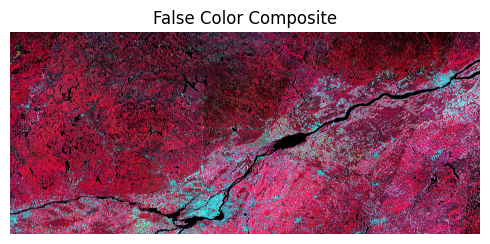

In [2]:
import importlib
import matplotlib.pyplot as plt
import utils

importlib.reload(utils)

filepaths = [
    "../data/satelitte_data/quebec_mosaic/mosaic_FalseColor.tif"
]

titles = ["False Color Composite"
        ]

fig, axes = utils.visualize_sentinel_tiles(filepaths, titles)
plt.show()

Number of bands: 2
Image shape: 7626 x 17704
Array shape: (2, 7626, 17704)


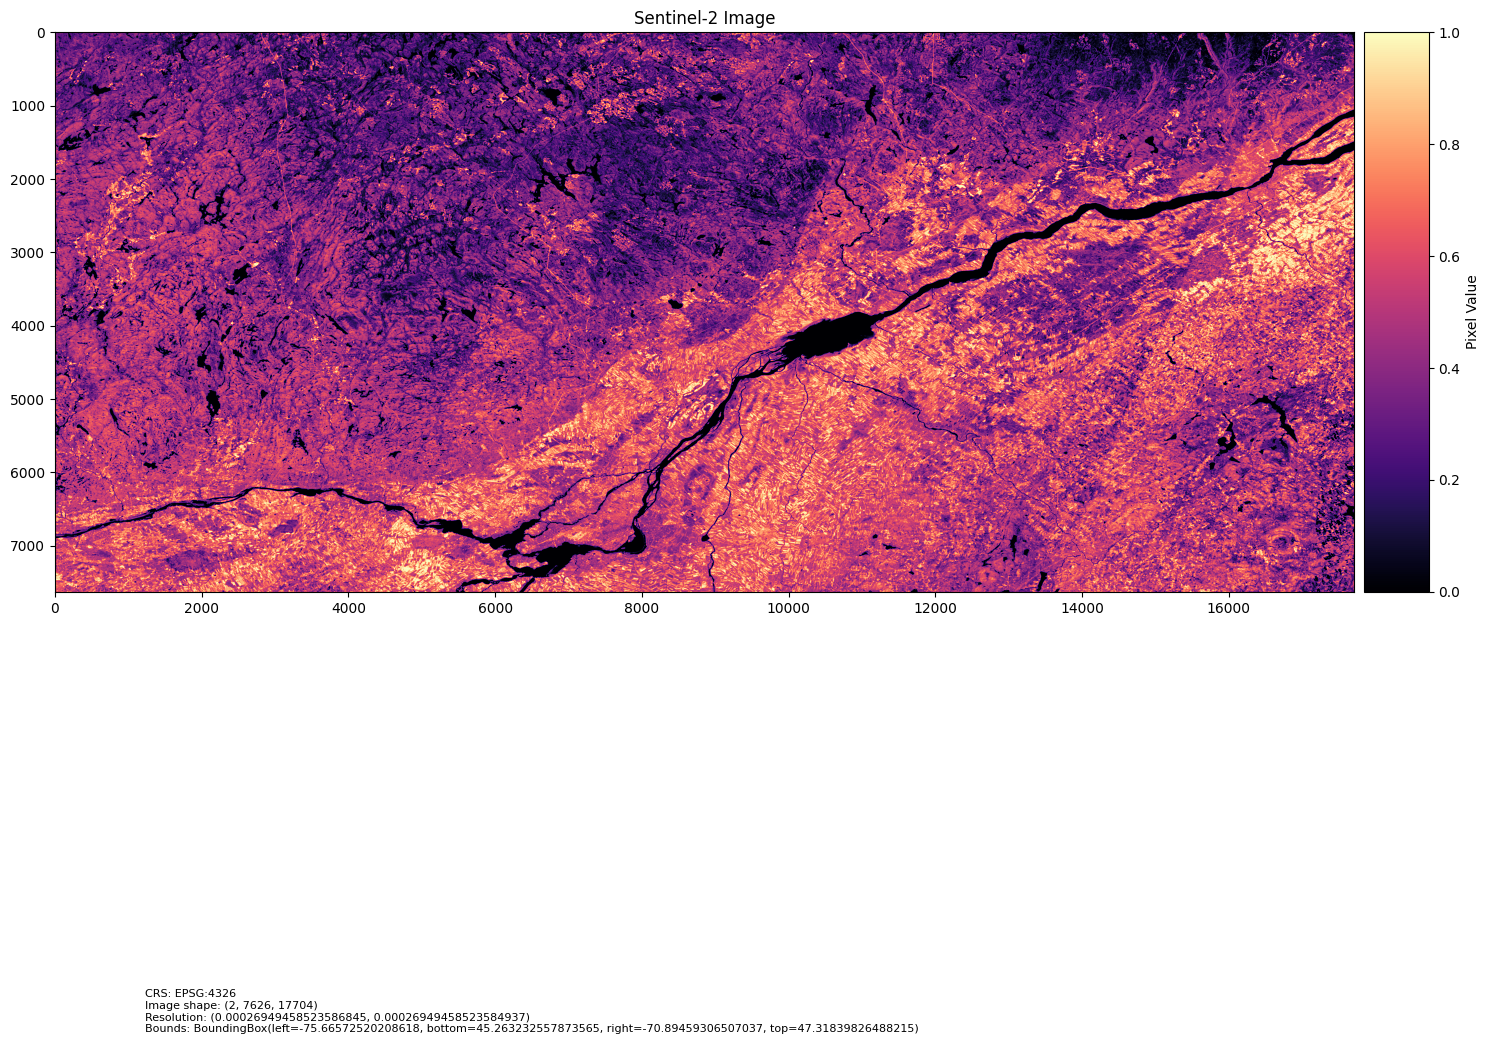

In [14]:
importlib.reload(utils)
filepaths = "../data/satelitte_data/quebec_mosaic/mosaic_SWIR.tif"

fig, ax = utils.visualize_sentinel_tile(filepaths, colormap='magma')